What's Matplotlib?

- A python plotting library

- Built on NumPy arrays
- Integrates directly with pandas
- Can create basic and advanced plots
- Simple to use interface


In [1]:
# To show the plot inline with Jupyter notebook output, use below magic function
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Two ways of plotting using matplotlib

## pyplot based plotting (less flexible)

[]

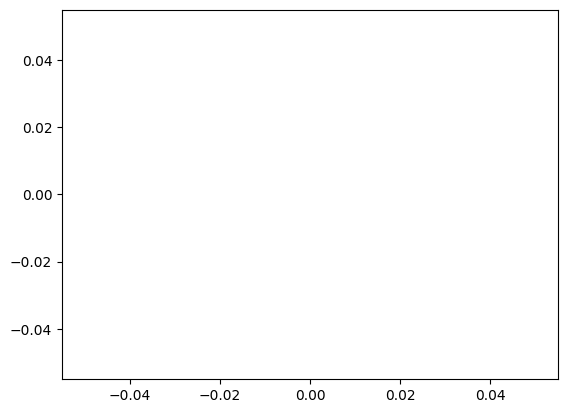

In [2]:
plt.plot()

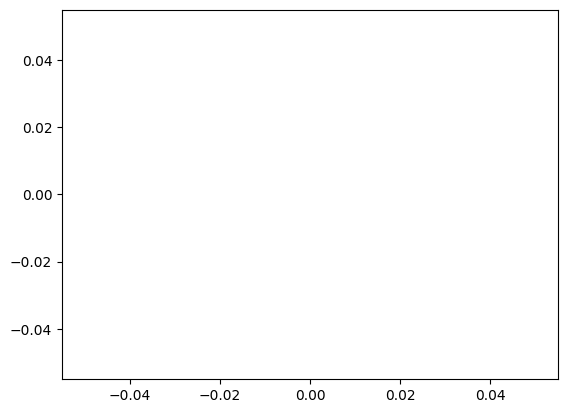

In [3]:
plt.plot(); # semi-colon at the end avoids the empty [] output as above

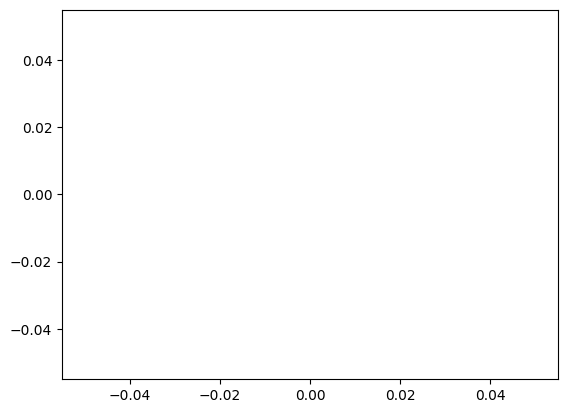

In [4]:
plt.plot()
plt.show()

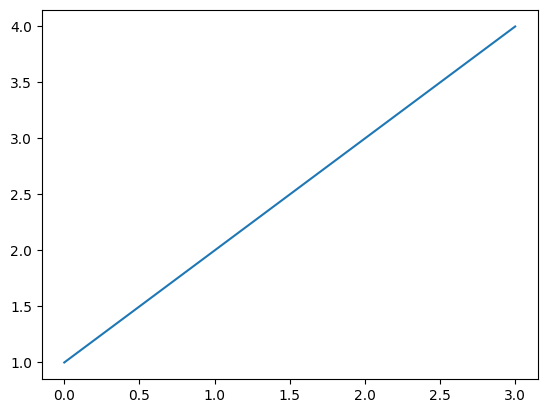

In [6]:
plt.plot([1,2,3,4]);

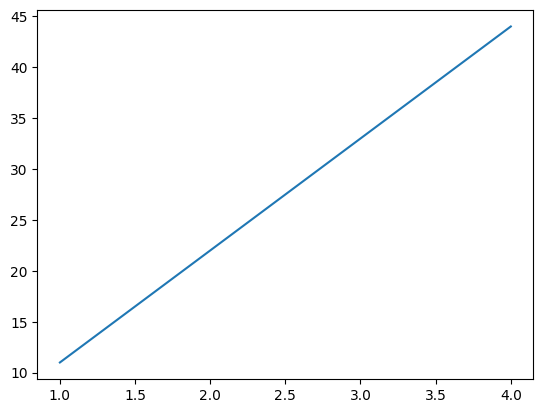

In [7]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y)

## Object-oriented API based plotting (more flexible)

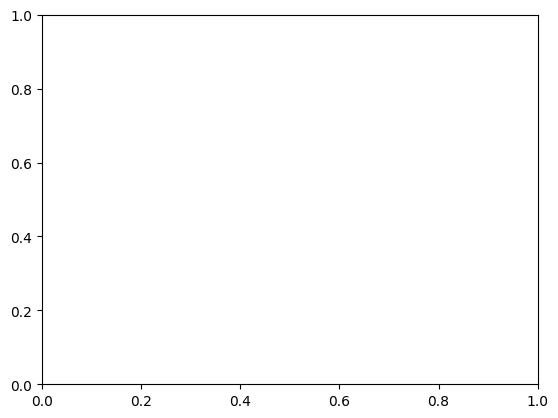

In [10]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

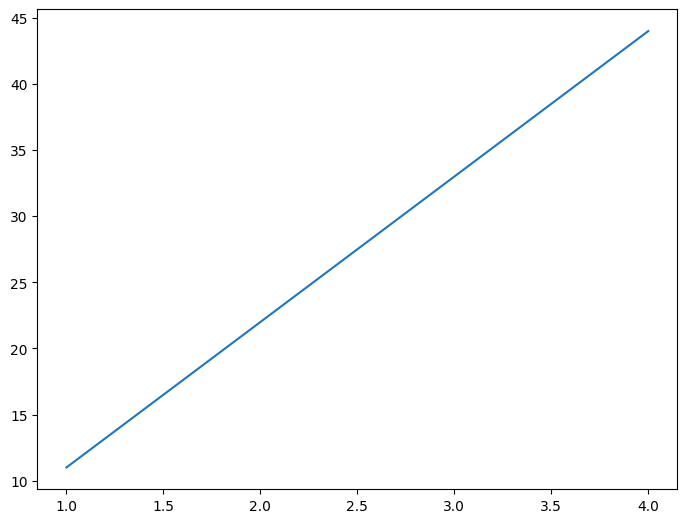

In [13]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y);

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

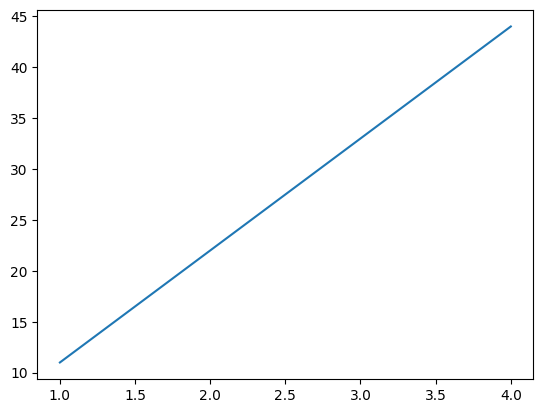

In [15]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,y);
type(fig), type(ax)

# Matplotlib Example Workflow

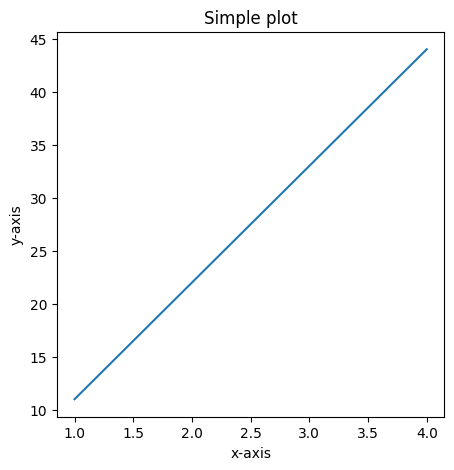

In [17]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(5,5)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save and show (you save the whole figure)
fig.savefig("images/sample-plot.png")



# Making figures with NumPy arrays

In [18]:
import numpy as np

In [19]:
# create data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

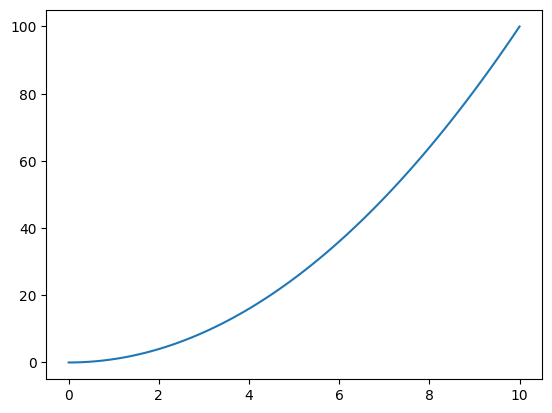

In [20]:
# plot the data and create a line plot (default)
fig, ax = plt.subplots()
ax.plot(x, x**2);

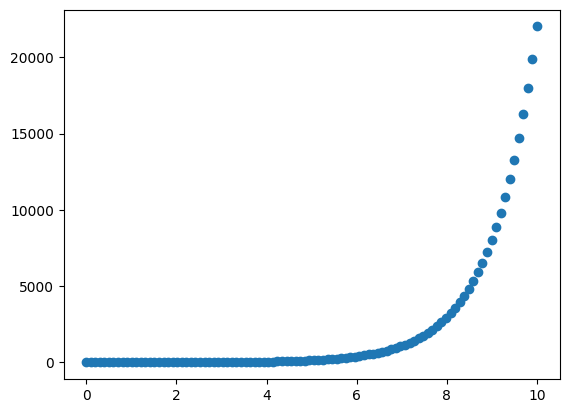

In [21]:
# Use same data to make scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

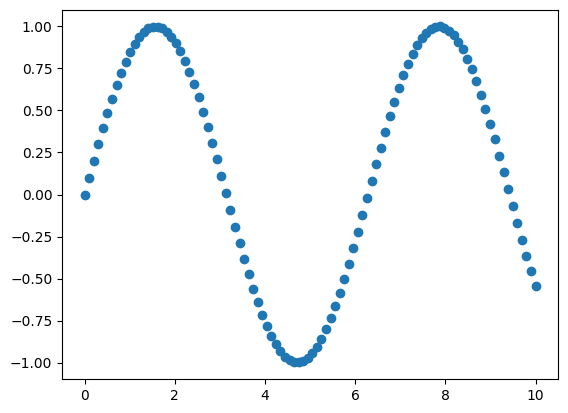

In [22]:
# another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

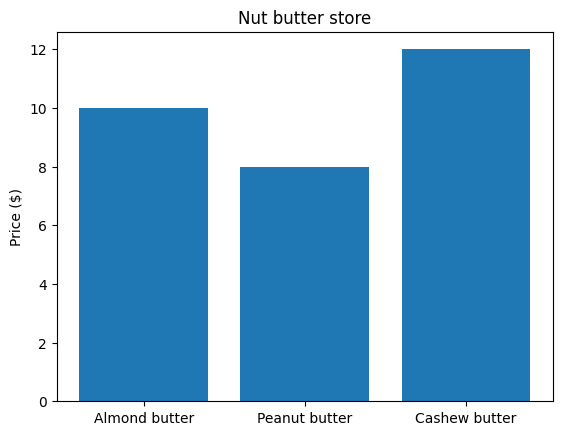

In [2]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig,ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Nut butter store", ylabel="Price ($)");

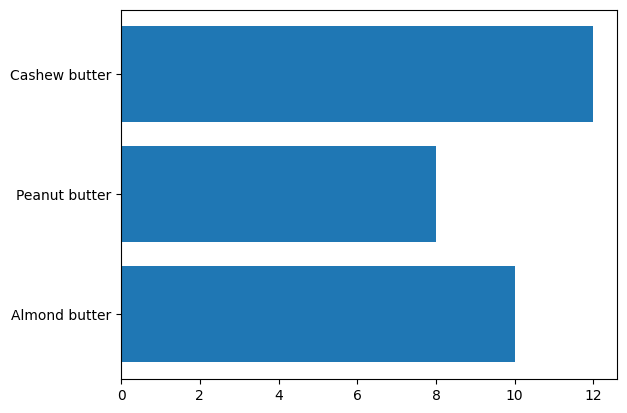

In [5]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()));

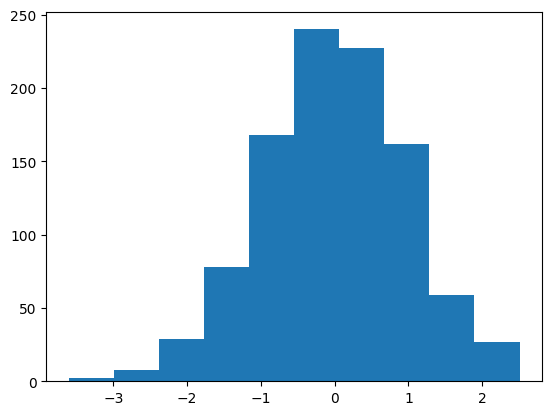

In [6]:
# Histogram

# Make some data
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

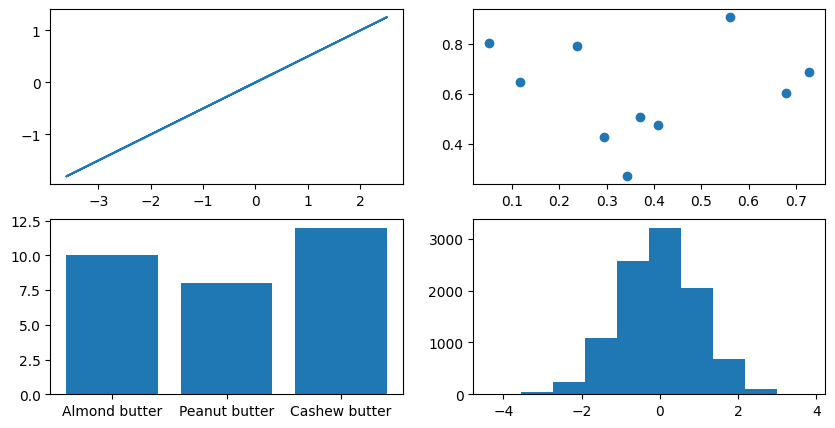

In [11]:
# subplot option 1
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2,
                                           ncols=2,
                                           figsize=(10,5))
ax1.plot(x,x/2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax4.hist(np.random.randn(10000));

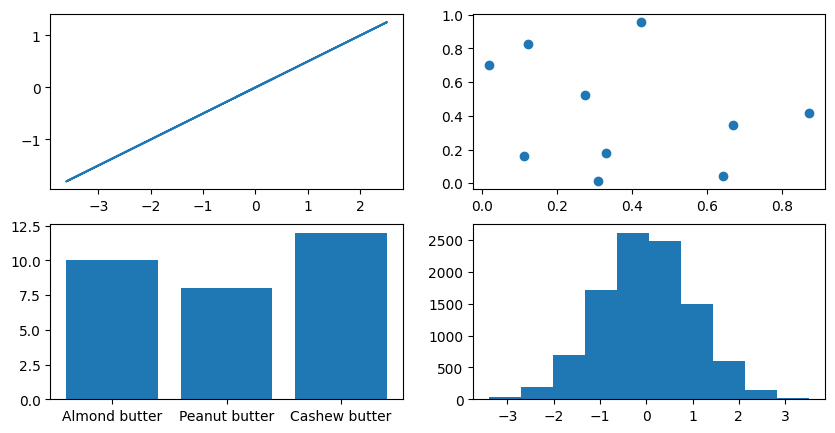

In [16]:
# Subplots Option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))
# Plot to each different index of axis
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(10),np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax[1,1].hist(np.random.randn(10000));

# Plotting from pandas dataframe

https://pandas.pydata.org/docs/user_guide/visualization.html

In [17]:
import pandas as pd

In [19]:
# Make a dataframe
car_sales = pd.read_csv("data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [23]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2023", periods=1000))

ts

2023-01-01   -1.022224
2023-01-02   -0.697194
2023-01-03   -0.009972
2023-01-04   -0.517802
2023-01-05   -1.037987
                ...   
2025-09-22   -1.095088
2025-09-23   -1.716932
2025-09-24    1.238402
2025-09-25    1.098098
2025-09-26   -0.250885
Freq: D, Length: 1000, dtype: float64

<Axes: >

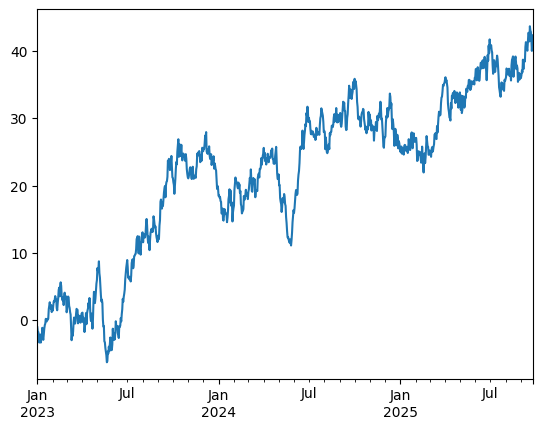

In [24]:
ts = ts.cumsum()

ts.plot()